# Model

## Data Splitting and Scaling


Now we split our dataset to traning (70%) and test set (30%). Then we scale our numerical columns using StandardScaler

In [53]:
df7=df6.copy()

Numeric=['creditLimit','availableMoney','transactionAmount','accountOpenDate_days','dateOfLastAddressChange_days',
         'currentExpDate_days','tran_day','tran_hour']

Y = df7['isFraud']
X = df7.drop(['isFraud'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
scaling = StandardScaler()

X_train_num=X_train[Numeric]
X_test_num=X_test[Numeric]

X_train_num_s = scaling.fit_transform(X_train_num)
X_test_num_s = scaling.transform(X_test_num)


X_train_s = pd.DataFrame(X_train_num_s)
X_test_s = pd.DataFrame(X_test_num_s)
X_train_s.columns = X_train_num.columns
X_test_s.columns = X_test_num.columns

X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)

X_train[Numeric]=X_train_s
X_test[Numeric]=X_test_s

X_train.drop(['index'], axis=1,inplace=True)
X_test.drop(['index'], axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Sampling

First we wanted to know if our dataset are balanced or not by geting the ratio of fraudulent transactions over the total number of transactions in the dataset. 

Percentage of Non-Fraudulent Cases:  98.42993371048878 %
Percentage of Fraudulent Cases:  1.5700662895112127 %


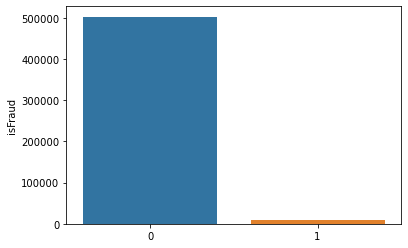

In [54]:
fraud_counts=Y_train.value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts)
print("Percentage of Non-Fraudulent Cases: ",100*fraud_counts[0]/(fraud_counts[0]+fraud_counts[1]),'%')
print("Percentage of Fraudulent Cases: ",100*fraud_counts[1]/(fraud_counts[0]+fraud_counts[1]),'%')

We see that 1.57% percent of of our transactions are Fraudulent Cases which means we have heavy inbalance data.

Resampling can help model performance in cases of imbalanced data sets. There are three methods:
    
    - Undersampling non-fraud transactions: Remove random draws from the non-fraud observations
    - Oversampling fraud transactions: Take random draws from the fraud cases and duplicate them
    - Synthetic minority Oversampling Technique (SMOTE): Uses characteristics of nearest neighbors of fraud cases 
    to create new synthetic fraud cases




Before applying resampling methods, we slpited the data into train and test sets because test data should be free of duplicates and synthetic data. So we use resampling methods only on the training set, not on the test set.

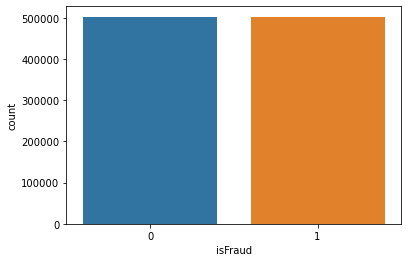

In [55]:
method = SMOTE(random_state = 21)
X_train, Y_train = method.fit_sample(X_train, Y_train)
sns.countplot(Y_train)


## Model selection

In [56]:
X_val=X_test
Y_val=Y_test

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
lr=LogisticRegression(random_state = 42)
lr.fit(X_train,Y_train)
lr_val = lr.predict(X_val)
lr_pred_train = lr.predict_proba(X_train)[:,1]
lr_pred_val = lr.predict_proba(X_val)[:,1]
lr_train_auc = roc_auc_score(Y_train, lr_pred_train)
lr_val_auc = roc_auc_score(Y_val, lr_pred_val)
print('AUC_Training:%.2f'%lr_train_auc)
print('AUC_Validation:%.2f'%lr_val_auc)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC_Training:0.86
AUC_Validation:0.71


### Random Forest Classifier

In [58]:
rf = RandomForestClassifier(max_depth = 6, random_state = 42) 
rf.fit(X_train,Y_train)
rf_pred_train = rf.predict_proba(X_train)[:,1]
rf_pred_val = rf.predict_proba(X_val)[:,1]
rf_train_auc = roc_auc_score(Y_train, rf_pred_train)
rf_val_auc = roc_auc_score(Y_val, rf_pred_val)
print('AUC_Training:%.2f'%rf_train_auc)
print('AUC_Validation:%.2f'%rf_val_auc)

AUC_Training:0.81
AUC_Validation:0.74


### Gradient Boosting

In [59]:
#Gradient Boosting
gb = GradientBoostingClassifier() 
gb.fit(X_train,Y_train)
gb_val = gb.predict(X_val)
gb_pred_train = gb.predict_proba(X_train)[:,1]
gb_pred_val = gb.predict_proba(X_val)[:,1]
gb_train_auc = roc_auc_score(Y_train, gb_pred_train)
gb_val_auc = roc_auc_score(Y_val, gb_pred_val)
print('AUC_Training:%.2f'%gb_train_auc)
print('AUC_Validation:%.2f'%gb_val_auc)

AUC_Training:0.93
AUC_Validation:0.73


### Stochastic Gradient Descent

In [60]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgd.fit(X_train,Y_train)
sgd_val = sgd.predict(X_val)
sgd_pred_train = sgd.predict_proba(X_train)[:,1]
sgd_pred_val = sgd.predict_proba(X_val)[:,1]
sgd_train_auc = roc_auc_score(Y_train, sgd_pred_train)
sgd_val_auc = roc_auc_score(Y_val, sgd_pred_val)
print('AUC_Training:%.2f'%sgd_train_auc)
print('AUC_Validation:%.2f'%sgd_val_auc)

AUC_Training:0.73
AUC_Validation:0.72


### Ada Boost Classifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(random_state = 42)
adb.fit(X_train,Y_train)
adb_val = adb.predict(X_val)
adb_pred_train = adb.predict_proba(X_train)[:,1]
adb_pred_val = adb.predict_proba(X_val)[:,1]
adb_train_auc = roc_auc_score(Y_train, adb_pred_train)
adb_val_auc = roc_auc_score(Y_val, adb_pred_val)
print('AUC_Training:%.2f'%adb_train_auc)
print('AUC_Validation:%.2f'%adb_val_auc)

AUC_Training:0.88
AUC_Validation:0.69


## Comparison and performance evaluation

Accuracy isn't a reliable performance metric when working with highly imbalanced data (such as fraud detection). 

We use AUC metric to compare different models. AUC is area under the ROC curve. Precision and recall are calculated using single threshold but AUC takes all possible thresholds for calculating FPR and TPR. So it is more powerfull.

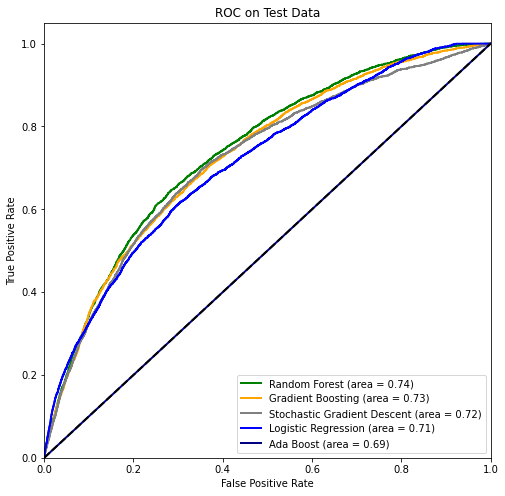

In [62]:
lr1,lr2,_= roc_curve(Y_val, lr_pred_val) #lr_val_auc
rf1,rf2,_= roc_curve(Y_val, rf_pred_val) #rf_val_auc
gb1,gb2,_= roc_curve(Y_val, gb_pred_val) #gb_val_auc
sgd1,sgd2,_= roc_curve(Y_val, sgd_pred_val) #sgd_val_auc
adb1,adb2,_= roc_curve(Y_val, adb_pred_val) #adb_val_auc

plt.figure(figsize=(8, 8))
plt.plot(rf1, rf2, color='green',lw=2, label='Random Forest (area = %0.2f)' % rf_val_auc)
plt.plot(gb1, gb2, color='orange',lw=2, label='Gradient Boosting (area = %0.2f)' % gb_val_auc)
plt.plot(sgd1, sgd2, color='gray',lw=2, label='Stochastic Gradient Descent (area = %0.2f)' % sgd_val_auc)
plt.plot(lr1, lr2, color='blue',lw=2, label='Logistic Regression (area = %0.2f)' % lr_val_auc)
plt.plot(adb1, adb1, color='navy',lw=2, label='Ada Boost (area = %0.2f)' % adb_val_auc)

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC on Test Data')
plt.legend(loc="lower right")
plt.show()

Random Forest works better on our test dataset (has higher AUC rather than other model), so we choose Random Forest as the best model that identify fraud transactions. Here we can see confusion matrixs, accuracy, precision, and recall for Random Forest on test data:

In [63]:
print(" ***** RF Classifier on Test Dataset ***** ")
print(classification_report(Y_val, np.argmax(rf.predict_proba(X_val), axis=1)))

 ***** RF Classifier on Test Dataset ***** 
              precision    recall  f1-score   support

           0       0.99      0.77      0.86    215394
           1       0.04      0.58      0.07      3387

    accuracy                           0.76    218781
   macro avg       0.51      0.67      0.47    218781
weighted avg       0.98      0.76      0.85    218781



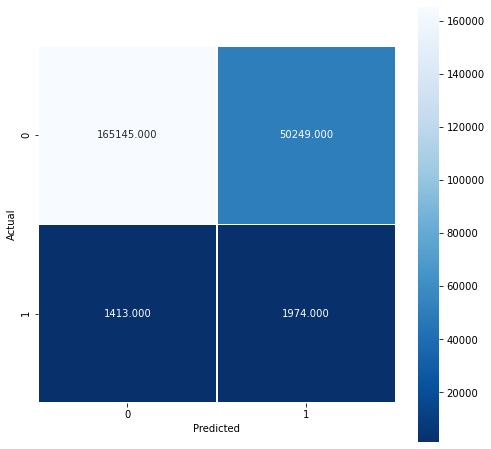

In [64]:
fig, ax = plt.subplots(figsize=(8,8), ncols=1, nrows=1)
ax=sns.heatmap(confusion_matrix(Y_val, np.argmax(rf.predict_proba(X_val), axis=1)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');

Please note that the test data is not resampled so it is heavy imbalanced.

## Most Important Feature Based on Random Forest

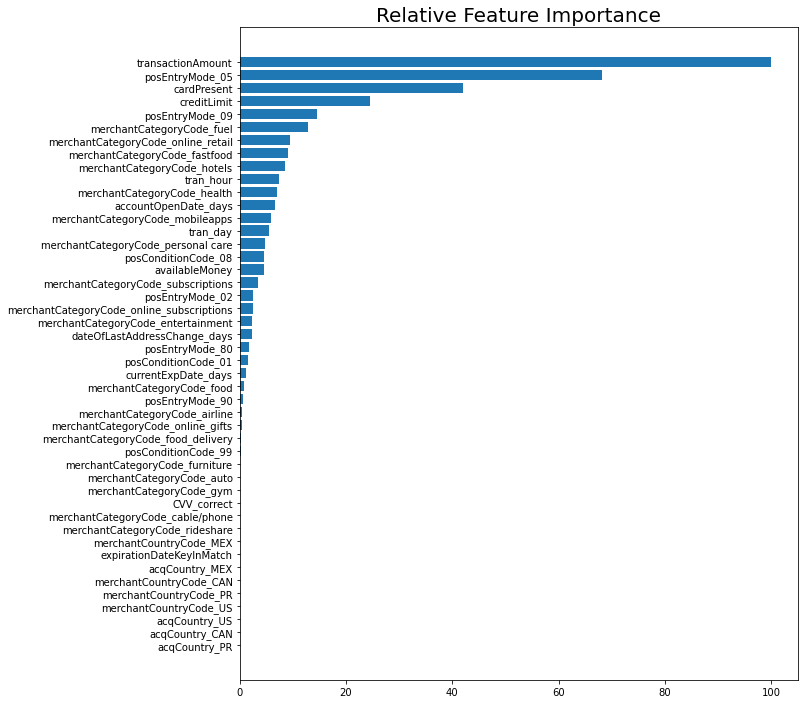

In [65]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
importances = rf.feature_importances_

feature_importance = 100.0 * (importances / importances.max()) # relative importance
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_train.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5


# plot top features
plt.figure(figsize=(10, 12))
plt.barh(pos[:], feature_importance[sorted_idx[:]], align='center')
plt.yticks(pos[:], feature_names_sort[:])
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

Some features are more important than others to identify fraud transactions. Here we found the 10 most important features that can identify fraud transactions based on Random Forest ML model.

    - Transaction Amount
    - PosEntryMode = 05
    - Card Present
    - Credit Limit
    - Pos Entry Mode = 09
    - Merchant Category Code = 'Fuel' or 'Online Retail' or 'Fastfood' or 'Hotels'
    - Hours that transaction happen (tran_hour)


In [66]:
print ('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print (feature)

Top 10 features are: 
transactionAmount
posEntryMode_05
cardPresent
creditLimit
posEntryMode_09
merchantCategoryCode_fuel
merchantCategoryCode_online_retail
merchantCategoryCode_fastfood
merchantCategoryCode_hotels
tran_hour


## Hyperparameter tuning for Random Forest

In [ ]:
# tuned model
param_grid ={
        'n_estimators': [1,20, 100], # number of trees
        'max_features': ['auto','log2'],
        'max_depth': range(2,10,2), # max depth of the tree
        'min_samples_split': range(2,10,2), # min number of samples to split a node
        'criterion': ['gini', 'entropy'],
},

model = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1) # cv: number of cross-validation splits

rf_grid.fit(X_train, Y_train)
Y_val_predict_grid = rf_grid.predict_proba(X_val)[:,1]

print(rf_grid.best_params_) # print best parameters 

We want to discover the best parameters for our model including split criterion, the number of estimators (trees), the maximum depth of the tree, and the maximum features. But because our dataset is big, I couldn't run it in reasonable amount of time, so I keep it as future works.